# phitigra: a simple graph editor

[SageMath](https://www.sagemath.org/) has a large set of functions for [graph theory](https://doc.sagemath.org/html/en/reference/graphs/index.html). Defining graphs by hand can however be complicated as vertices and edges are added with the command line.
This package is an editor that allows to define or change graphs using the mouse. It has the form of a [Jupyter](https://jupyter.org/) widget.

## Getting started


In [1]:
from phitigra import SimpleGraphEditor

The editor widget is a `SimpleGraphEditor` object. By default the canvas is empty; you can add vertices and edges by clicking on *add vertex or edge* and clicking on the canvas.

In [5]:
editor = SimpleGraphEditor()
editor.show()

It is also possible to plot (and later edit) an already existing graph. Note that the two instances of the editor are completely independent.

In [6]:
G = graphs.PetersenGraph()
editor2 = SimpleGraphEditor(G)
editor2.show()

The graph drawn can be accessed with `.graph`. It is the same object as the graph given when creating the widget.

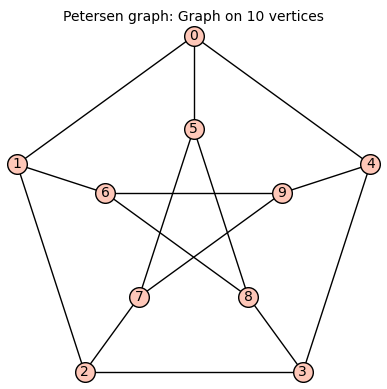

In [7]:
editor2.graph

In [8]:
editor2.graph is G

True

A copy of the drawn graph can be obtained as follows:

In [9]:
H = editor2.get_graph()
H == G and not H is G

True

### Application 1: testing a conjecture

Suppose you defined a boolean function `myfun` and conjecture that it returns `True` on every graph.
By drawing graphs in the editor and calling `myfun(editor.get_graph())`, you can try to find a small counterexample.

### Application 2: producing pictures for your papers

The drawing of the graph in the editor can be exported to a latex (tikz) picture to be included in a paper. The latex code can be obtained as follows: 

In [10]:
latex(editor2.graph)

\begin{tikzpicture}
\definecolor{cv0}{rgb}{0.0,0.0,0.0}
\definecolor{cfv0}{rgb}{1.0,1.0,1.0}
\definecolor{clv0}{rgb}{0.0,0.0,0.0}
\definecolor{cv1}{rgb}{0.0,0.0,0.0}
\definecolor{cfv1}{rgb}{1.0,1.0,1.0}
\definecolor{clv1}{rgb}{0.0,0.0,0.0}
\definecolor{cv2}{rgb}{0.0,0.0,0.0}
\definecolor{cfv2}{rgb}{1.0,1.0,1.0}
\definecolor{clv2}{rgb}{0.0,0.0,0.0}
\definecolor{cv3}{rgb}{0.0,0.0,0.0}
\definecolor{cfv3}{rgb}{1.0,1.0,1.0}
\definecolor{clv3}{rgb}{0.0,0.0,0.0}
\definecolor{cv4}{rgb}{0.0,0.0,0.0}
\definecolor{cfv4}{rgb}{1.0,1.0,1.0}
\definecolor{clv4}{rgb}{0.0,0.0,0.0}
\definecolor{cv5}{rgb}{0.0,0.0,0.0}
\definecolor{cfv5}{rgb}{1.0,1.0,1.0}
\definecolor{clv5}{rgb}{0.0,0.0,0.0}
\definecolor{cv6}{rgb}{0.0,0.0,0.0}
\definecolor{cfv6}{rgb}{1.0,1.0,1.0}
\definecolor{clv6}{rgb}{0.0,0.0,0.0}
\definecolor{cv7}{rgb}{0.0,0.0,0.0}
\definecolor{cfv7}{rgb}{1.0,1.0,1.0}
\definecolor{clv7}{rgb}{0.0,0.0,0.0}
\definecolor{cv8}{rgb}{0.0,0.0,0.0}
\definecolor{cfv8}{rgb}{1.0,1.0,1.0}
\definecolor{clv8}{rgb}{0.0

The resulting pdf image can be seen as follows. (See [this page](https://doc.sagemath.org/html/en/tutorial/latex.html#an-example-combinatorial-graphs-with-tkz-graph) for more details.)

In [28]:
view(editor2.graph)

## Widget settings

Several parameters of the widget can be defined:
  * the width and height of the drawing canvas;
  * the default radius and color for vertices;
  * the default color for edges.

In [35]:
editor3 = SimpleGraphEditor(graphs.PetersenGraph(), width=300, height=300, default_radius=12, default_vertex_color='orange', default_edge_color='#666')
editor3.show()

## Changing the drawing

Changes to the drawing can be done with the mouse of course, but also by calling appropriate functions.

In [62]:
K = graphs.RandomGNP(10, 0.5)#CompleteGraph(10)
editor4 = SimpleGraphEditor(K)
editor4.show()

In [64]:
editor4.set_vertex_color(1, 'white') # recolor vertex 1
editor4.set_vertex_radius(6, 25) # make vertex 6 bigger
editor4.refresh() # needed to update the canvas

#### Application 4

The colors of the vertices and edges can be defined by a function.

In [65]:
for v in editor4.graph:
    # Radius depends on degree:
    editor4.set_vertex_radius(v, editor4.graph.degree(v)*3+5)
    # Color depends on parity
    if is_odd(v):
        editor4.set_vertex_color(v, '#4040dd')
    else:
        editor4.set_vertex_color(v, 'green')

for e in editor4.graph.edge_iterator():
    u, v, _ = e
    if is_odd(u + v):
        editor4.set_edge_color((u,v), 'orange')
    else:
        editor4.set_edge_color((u,v), 'purple')
editor4.refresh()

## Calling a custom function by mouse clicks